In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sklearn
import seaborn as sns
%matplotlib inline
from scipy import stats

## (1) Data Pre-processing

In [2]:
data = pd.read_csv("CreditScoring(After_Preprocessing).csv")
data.head()

Status  Seniority   Home  Time  Age  Marital  Records        Job  Expenses  \
0   good          9   rent    60   30  married   no_rec  freelance        73   
1   good         17   rent    60   58    widow   no_rec      fixed        48   
2    bad         10  owner    36   46  married  yes_rec  freelance        90   
3   good          0   rent    60   24   single   no_rec      fixed        63   
4   good          0   rent    36   26   single   no_rec      fixed        46   

   Income  Assets  Debt  Amount  Price     Finrat   Savings  
0     129       0     0     800    846  94.562648  4.200000  
1     131       0     0    1000   1658  60.313631  4.980000  
2     200    3000     0    2000   2985  67.001675  1.980000  
3     182    2500     0     900   1325  67.924528  7.933333  
4     107       0     0     310    910  34.065934  7.083871

In [3]:
## Dataset Dimensions
data.shape

(4446, 16)

### Questions to keep in mind:
#### (1) check maximum and minimum values
#### (2) check the scale of the variables (categorical, continuous, etc)
#### (3) look for outliers, weird values, missing values

In [4]:
# Checking if any Missing Values are there in the Dataset
# No Missing Values are there in the Dataset
data.isnull().any()

Status       False
Seniority    False
Home         False
Time         False
Age          False
Marital      False
Records      False
Job          False
Expenses     False
Income       False
Assets       False
Debt         False
Amount       False
Price        False
Finrat       False
Savings      False
dtype: bool

In [5]:
## checking if any categorical Features are there in the Dataset
categorical_data = data.select_dtypes(exclude=[np.number])
print ("There are {} categorical Columns in Dataset".format(categorical_data.shape[1]))

There are 5 categorical Columns in Dataset


In [16]:
# Name of all the Categorical Features Present in the Dataset
categorical_data.any()

Status     True
Home       True
Marital    True
Records    True
Job        True
dtype: bool

### Convert Categorical Data into Numerical Data using Encoder

In [7]:
from sklearn.preprocessing import LabelEncoder
model = LabelEncoder()
data['Status'] = model.fit_transform(data['Status'].astype('str'))
data['Home'] = model.fit_transform(data['Home'].astype('str'))
data['Marital'] = model.fit_transform(data['Marital'].astype('str'))
data['Job'] = model.fit_transform(data['Job'].astype('str'))
data['Records'] = model.fit_transform(data['Records'].astype('str'))

In [8]:
#Checking Data Types of the Features for Confirmation
data.dtypes

Status         int64
Seniority      int64
Home           int64
Time           int64
Age            int64
Marital        int64
Records        int64
Job            int64
Expenses       int64
Income         int64
Assets         int64
Debt           int64
Amount         int64
Price          int64
Finrat       float64
Savings      float64
dtype: object

## (2) Data Exploration

In [9]:
# Summary of the Data
data.describe()

Status    Seniority         Home         Time          Age  \
count  4446.000000  4446.000000  4446.000000  4446.000000  4446.000000   
mean      0.719073     7.991453     2.862348    46.453441    37.084121   
std       0.449502     8.176370     1.308943    14.647979    10.986366   
min       0.000000     0.000000     0.000000     6.000000    18.000000   
25%       0.000000     2.000000     2.000000    36.000000    28.000000   
50%       1.000000     5.000000     2.000000    48.000000    36.000000   
75%       1.000000    12.000000     4.000000    60.000000    45.000000   
max       1.000000    48.000000     5.000000    72.000000    68.000000   

           Marital      Records          Job     Expenses       Income  \
count  4446.000000  4446.000000  4446.000000  4446.000000  4446.000000   
mean      1.503599     0.172964     0.610886    55.601439   140.629780   
std       0.891838     0.378259     0.960975    19.520839    80.177896   
min       0.000000     0.000000     0.000000    35.000000     1.000000   
25%       1.000000     0.000000     0.000000    35.000000    90.000000   
50%       1.000000     0.000000     0.000000    51.000000   124.000000   
75%       2.000000     0.000000     1.000000    72.000000   170.000000   
max       4.000000     1.000000     3.000000   180.000000   959.000000   

              Assets          Debt       Amount         Price       Finrat  \
count    4446.000000   4446.000000  4446.000000   4446.000000  4446.000000   
mean     5354.948943    342.257085  1038.763383   1462.480432    72.616409   
std     11534.328183   1244.694549   474.747952    628.555171    20.390595   
min         0.000000      0.000000   100.000000    105.000000     6.702413   
25%         0.000000      0.000000   700.000000   1116.250000    60.030020   
50%      3000.000000      0.000000  1000.000000   1400.000000    77.096757   
75%      6000.000000      0.000000  1300.000000   1691.500000    88.460263   
max    300000.000000  30000.000000  5000.000000  11140.000000   100.000000   

           Savings  
count  4446.000000  
mean      3.860083  
std       3.726292  
min      -8.160000  
25%       1.615385  
50%       3.120000  
75%       5.195688  
max      33.250000

In [23]:
## Value Counts of 'GOOD' Status and 'BAD' Status
## 'GOOD': 3197 and 'BAD': 1249
data.Status.value_counts()

1    3197
0    1249
Name: Status, dtype: int64

In [12]:
# As per the Dataset there are approximately 72% GOOD Score and 28% BAD Score instances
status_count = data.Status.value_counts()/len(data)
status_count

1    0.719073
0    0.280927
Name: Status, dtype: float64

## PEARSON’S CORRELATION
#### Covariance is rarely used in summary statistics because it is hard to interpret. By itself, it does not provide a sense of how much the two variables vary together, but only their ‘direction’ (if you consider each series to be a vector). The unit of Covariance is also confusing because it is the product of two different units. Pearson’s Correlation divides the Covariance with the product of the standard deviations of both series resulting in a dimensionless value.

#### Pearson’s Correlation is bounded in [-1, 1].
![Correlation Formula](files/corr.jpg "Correlation")
#### If it is positive, the two variables tend to be high or low together
#### If it is negative, the two variables tend to be opposite of each other
#### If it is zero or close to zero they don’t affect each other
#### Sx, Sy are the standard deviations of the X, Y series respectively. Standard Deviation (σ) is a measure of the spread of the distribution.

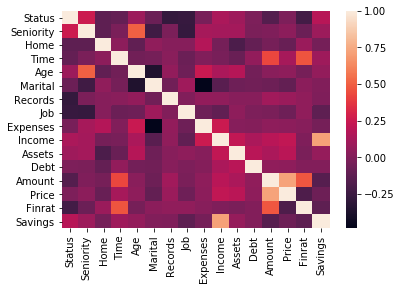

In [13]:
# Correlation between all the Features
# Correlation Plot
corr = data.corr()
sns.heatmap(corr)

#### As per the Correlation Matrix and the Correlation Values Calculated we can say that No Feature in the Dataset is highly Correlated with the Target Attribute 'Status'. Hence, there is no need for Feature Selection as of now and the Classification Model Such as 'Linear Regression ' and 'Logistic Regression' etc, can be performed directly on all the Features of the Dataset.

In [18]:
## Correlation Values of all the Features with respect to Target Variable 'Status' 
## Top 10 Values
print (corr['Status'].sort_values(ascending=False)[:10], '\n')

## Last 5 Values
print (corr['Status'].sort_values(ascending=False)[-5:])

Status       1.000000
Seniority    0.259742
Savings      0.185516
Income       0.144362
Assets       0.097239
Age          0.095305
Price       -0.010144
Debt        -0.010408
Expenses    -0.029633
Marital     -0.072958
Name: Status, dtype: float64 

Home      -0.123475
Amount    -0.154325
Finrat    -0.221790
Job       -0.267701
Records   -0.277817
Name: Status, dtype: float64


In [25]:
## Visualising Correlation Matrix with actual Correlation Values
cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "15pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '15pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(3)\
    .set_table_styles(magnify())

##### Dummy variables are "proxy" variables or numeric stand-ins for qualitative facts in a regression model. In regression analysis, the dependent variables may be influenced not only by quantitative variables (income, output, prices, etc.), but also by qualitative variables (gender, religion, geographic region, etc.). A dummy independent variable (also called a dummy explanatory variable) which for some observation has a value of 0 will cause that variable's coefficient to have no role in influencing the dependent variable, while when the dummy takes on a value 1 its coefficient acts to alter the intercept. For example, suppose membership in a group is one of the qualitative variables relevant to a regression. If group membership is arbitrarily assigned the value of 1, then all others would get the value 0.

## Histogram Plots of all the Features in the Dataset

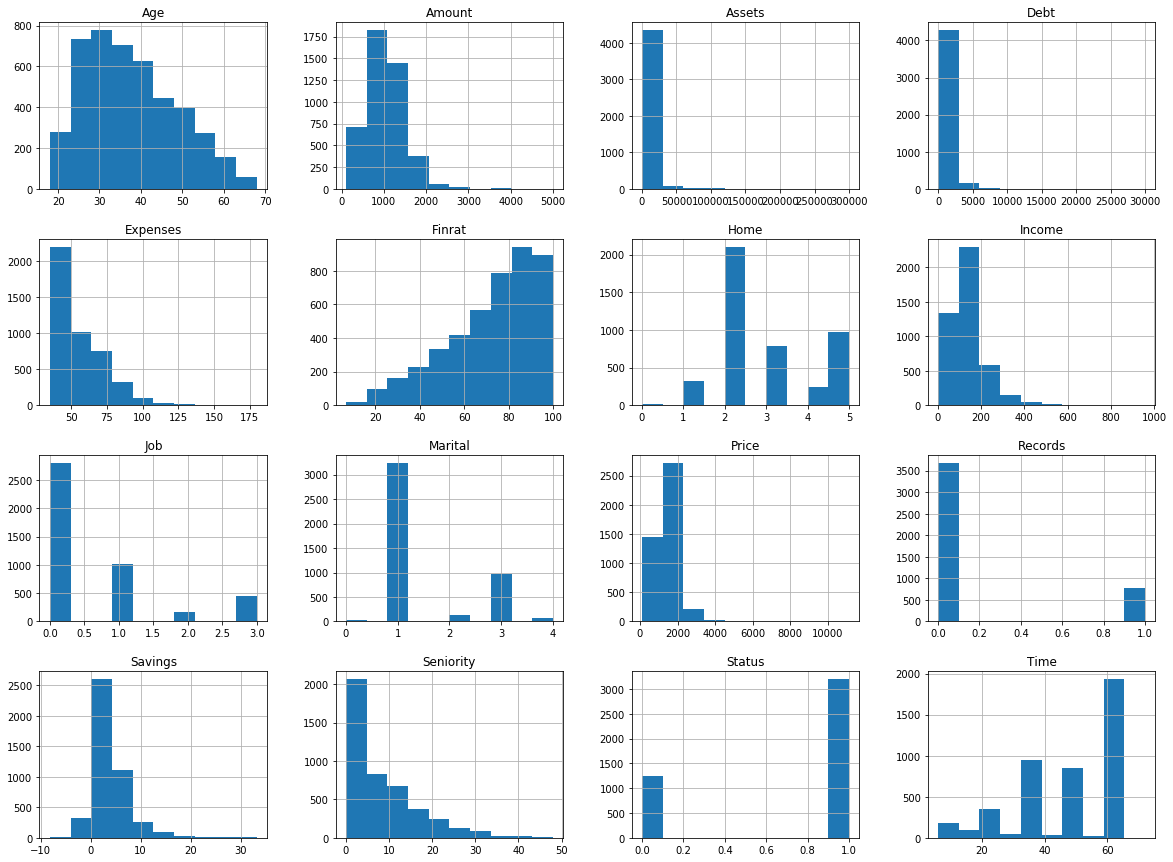

In [29]:
num_bins = 10

data.hist(bins = num_bins, figsize=(20,15))
plt.savefig("Data_Histogram_Plots")
plt.show()

## Scatterplots

## Creating Dummy Variables

In [36]:
list( data.columns )

['Status',
 'Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings']

In [37]:
X = list( data.columns )
X.remove( 'Status' )
X

['Seniority',
 'Home',
 'Time',
 'Age',
 'Marital',
 'Records',
 'Job',
 'Expenses',
 'Income',
 'Assets',
 'Debt',
 'Amount',
 'Price',
 'Finrat',
 'Savings']

In [42]:
Y = data['Status']

In [43]:
credit_data = pd.get_dummies( data[X], drop_first = True )
len( credit_data.columns )

15

In [46]:
### Splitting Dataset into 'Training' and 'Testing' Dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data[X], Y, test_size = 0.3, random_state = 42 )

## (I) Logistic Regression Model

In [49]:
## Using 'statsmodel.api' you can use R-style formulas together with pandas data frames to fit your models
import statsmodels.api as sm
logit = sm.Logit( y_train, sm.add_constant( X_train ) )
lg = logit.fit()

ModuleNotFoundError: No module named 'statsmodels'